In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url='https://drive.google.com/file/d/1RLgBVWXvQxmcm63w9Cg7FRJJZouhw4x-/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

Location Province  Collection Year  Collection Month  Collection Day  \
0         Alert       NU             2009                 1               5   
1         Alert       NU             2009                 1              12   
2         Alert       NU             2009                 1              19   
3         Alert       NU             2009                 1              26   
4         Alert       NU             2009                 2               2   
...         ...      ...              ...               ...             ...   
25831  Winnipeg       MB             2022                 2               8   
25832  Winnipeg       MB             2022                 2              15   
25833  Winnipeg       MB             2022                 2              22   
25834  Winnipeg       MB             2022                 3              21   
25835  Winnipeg       MB             2022                 4               5   

       Collection Time (s)  Air Volume (m3)  7Be Activity (mBq/m3)  \
0                   605280       1852.00000               2.775336   
1                   602040       1838.00000               2.511766   
2                   594900       1952.00000               2.623490   
3                   606180       2108.00000               1.531583   
4                   605220       2030.00000               3.542633   
...                    ...              ...                    ...   
25831               608160      12627.79980               2.504462   
25832               600480      12463.29980               2.882208   
25833               605220      12568.00000               2.397653   
25834              1286580      26409.90039               1.948618   
25835               605940      12439.90039               2.665944   

       7Be Uncertainty (mBq/m3)  7Be MDC (mBq/m3)  ...  134Cs MDC (mBq/m3)  \
0                      0.119936          0.183023  ...            0.017734   
1                      0.112781          0.186647  ...            0.015256   
2                      0.125648          0.215237  ...            0.014541   
3                      0.087783          0.182367  ...            0.014751   
4                      0.137878          0.182481  ...            0.015939   
...                         ...               ...  ...                 ...   
25831                  0.081238          0.054321  ...            0.005647   
25832                  0.088488          0.044860  ...            0.004136   
25833                  0.074691          0.038768  ...            0.003922   
25834                  0.055365          0.018533  ...            0.001683   
25835                  0.081997          0.042262  ...            0.003757   

       137Cs Activity (mBq/m3)  137Cs Uncertainty (mBq/m3)  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                          NaN                         NaN   
...                        ...                         ...   
25831                      NaN                         NaN   
25832                      NaN                         NaN   
25833                      NaN                         NaN   
25834                      NaN                         NaN   
25835                      NaN                         NaN   

       137Cs MDC (mBq/m3)  131I Activity (mBq/m3)  131I Uncertainty (mBq/m3)  \
0                0.014081                     NaN                        NaN   
1                0.014959                     NaN                        NaN   
2                0.013357                     NaN                        NaN   
3                0.012981                     NaN                        NaN   
4                0.013104                     NaN                        NaN   
...                   ...                     ...      

In [ ]:
df.columns

Index(['Location', 'Province', 'Collection Year', 'Collection Month',
       'Collection Day', 'Collection Time (s)', 'Air Volume (m3)',
       '7Be Activity (mBq/m3)', '7Be Uncertainty (mBq/m3)', '7Be MDC (mBq/m3)',
       '210Pb Activity (mBq/m3)', '210Pb Uncertainty (mBq/m3)',
       '210Pb MDC (mBq/m3)', '134Cs Activity (mBq/m3)',
       '134Cs Uncertainty (mBq/m3)', '134Cs MDC (mBq/m3)',
       '137Cs Activity (mBq/m3)', '137Cs Uncertainty (mBq/m3)',
       '137Cs MDC (mBq/m3)', '131I Activity (mBq/m3)',
       '131I Uncertainty (mBq/m3)', '131I MDC (mBq/m3)',
       '106Ru Activity (mBq/m3)', '106Ru Uncertainty (mBq/m3)',
       '106Ru MDC (mBq/m3)'],
      dtype='object')

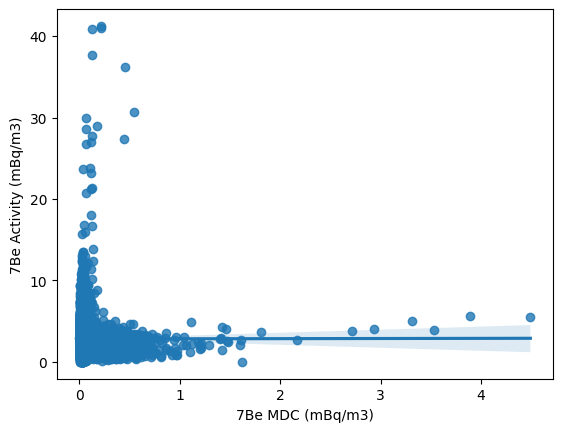

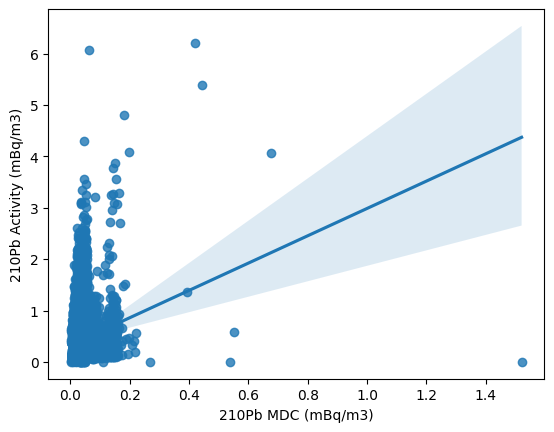

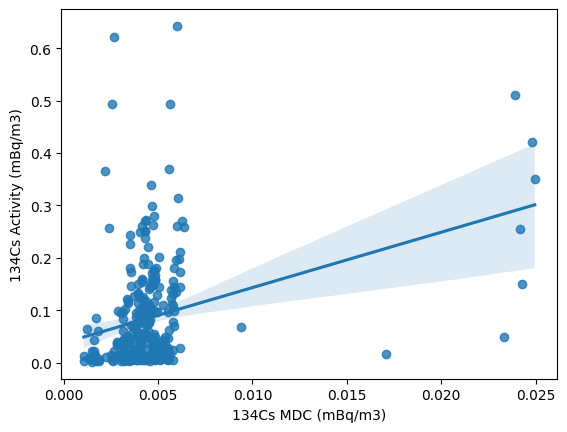

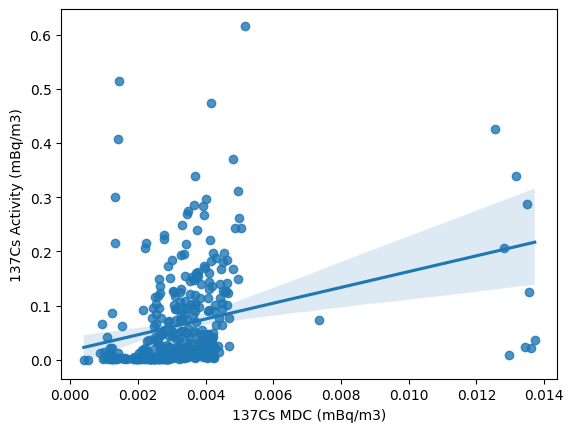

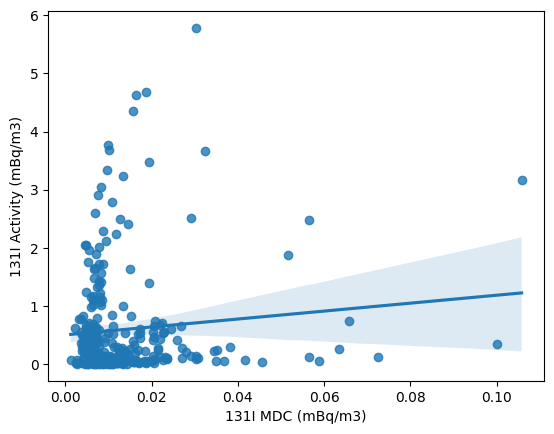

In [ ]:
for i in range(7,len(df.columns)-3,3):
  plt.figure()
  sns.regplot(x=f"{df.columns[i+2]}", y=f"{df.columns[i]}", data=df)
  plt.savefig(f'MDC{i}.png',dpi=1200)

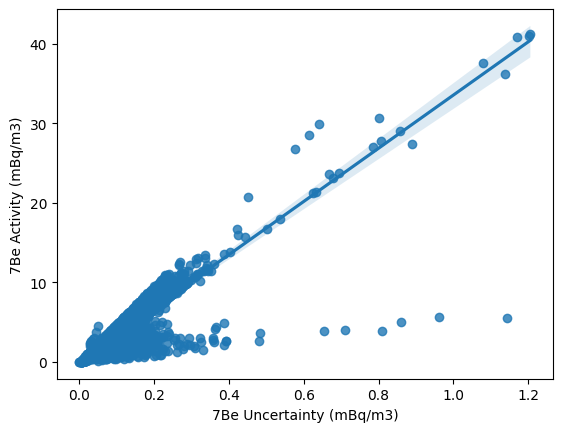

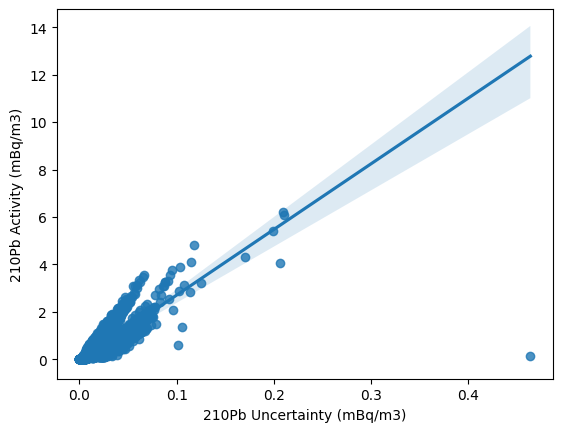

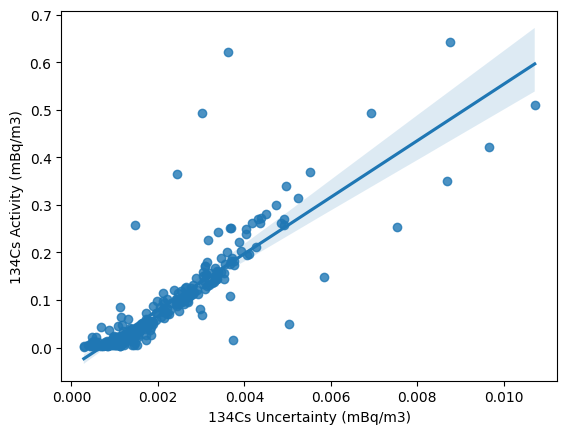

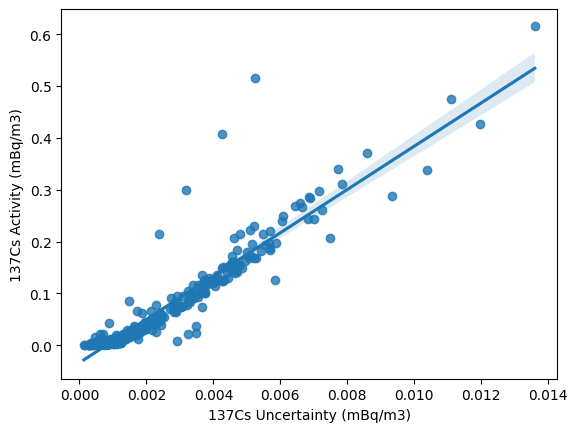

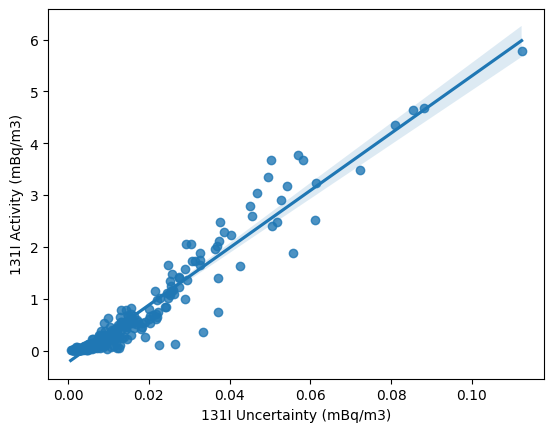

In [ ]:
for i in range(7,len(df.columns)-3,3):
  plt.figure()
  sns.regplot(x=f"{df.columns[i+1]}", y=f"{df.columns[i]}", data=df)
  plt.savefig(f'Uncertainty{i}.png',dpi=1200)

In [ ]:
df['Location'].unique()

array(['Alert', 'Amherstburg', 'Calgary', 'Charlottetown', 'Churchill',
       'Coral Harbour', 'Digby', 'Edmonton', 'Goose Bay', 'Greenwood',
       'Halifax', 'Inuvik', 'Iqaluit', 'Kuujjuarapik', 'Moncton',
       'Montreal', 'Moosonee', 'Ottawa', 'Port Hope', 'Quebec City',
       'Regina', 'Resolute', 'RPB', 'Saskatoon', 'Sidney', 'St. Johns',
       'Toronto', 'Vancouver', 'Whitehorse', 'Winnipeg'], dtype=object)

TypeError: ignored

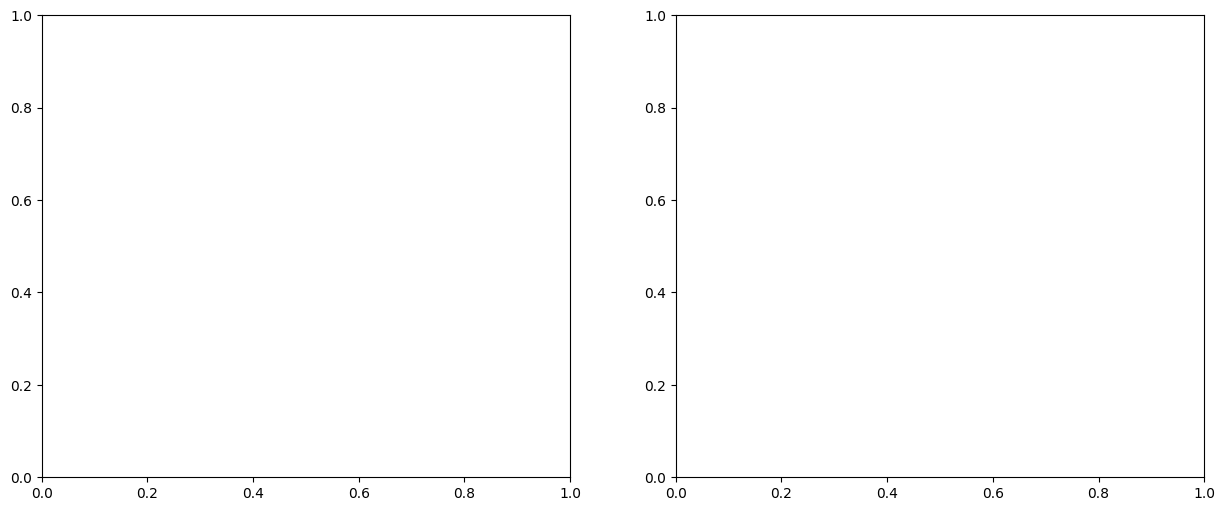

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages
for j in range(7,len(df.columns)-3,3):
  k=df.columns[j].split()[0]
  with PdfPages(f'{k}.pdf') as export_pdf:
    for i in df['Location'].unique():
      variable = df.columns[j]
      dfy=df[df['Location']==f'{i}']
      fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

      sns.boxplot(dfy['Collection Year'], dfy[variable], ax=ax[0])
      ax[0].set_title(f'Year-wise Box Plot\n({i})', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
      ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
      ax[0].set_ylabel(f'{variable}', fontsize = 16, fontdict=dict(weight='bold'))

      sns.boxplot(dfy['Collection Month'], dfy[variable], ax=ax[1])
      ax[1].set_title(f'Month-wise Box Plot\n({i})', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
      ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
      ax[1].set_ylabel(f'{variable}', fontsize = 16, fontdict=dict(weight='bold'))
      #export_pdf.savefig()
      plt.close()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages(f'Year.pdf') as export_pdf:
  for i in df['Location'].unique():
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(50, 10))
    plt.text(1,1,f'{i}',fontsize=20,fontdict=dict(weight='bold'))
    x=-1
    for j in range(7,len(df.columns)-3,3):
      k=df.columns[j].split()[0]
      x+=1
      variable = df.columns[j]
      dfy=df[df['Location']==f'{i}']

      sns.boxplot(dfy['Collection Year'], dfy[variable], ax=ax[x])
      ax[x].set_title(f'{i}\n{k}', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    export_pdf.savefig()
    plt.close()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages(f'Month.pdf') as export_pdf:
  for i in df['Location'].unique():
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(50, 10))
    plt.title('\033[1m'+f'{i}')
    x=-1
    for j in range(7,len(df.columns)-3,3):
      k=df.columns[j].split()[0]
      x+=1
      variable = df.columns[j]
      dfy=df[df['Location']==f'{i}']

      sns.boxplot(dfy['Collection Month'], dfy[variable], ax=ax[x])
      ax[x].set_title(f'{i}\n{k}', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    export_pdf.savefig()
    plt.close()

In [ ]:
col1=list(df.columns[3:7])
col2=list(df.columns[-3:-1])
data=df.drop(col1,axis=1).drop(col2,axis=1).drop(['Province','106Ru MDC (mBq/m3)'],axis=1)

In [ ]:
town=[]
for i in data.Location.unique():
    i=data[data.Location==i]
    town+=[i]
years=town[0]['Collection Year'].unique()
location=data.Location.unique()
cols=data.columns[2:]

In [ ]:
town[0]

Location  Collection Year  7Be Activity (mBq/m3)  \
0      Alert             2009               2.775336   
1      Alert             2009               2.511766   
2      Alert             2009               2.623490   
3      Alert             2009               1.531583   
4      Alert             2009               3.542633   
..       ...              ...                    ...   
610    Alert             2011               2.015630   
611    Alert             2011               2.844106   
612    Alert             2011                    NaN   
613    Alert             2011                    NaN   
614    Alert             2011                    NaN   

     7Be Uncertainty (mBq/m3)  7Be MDC (mBq/m3)  210Pb Activity (mBq/m3)  \
0                    0.119936          0.183023                 0.898299   
1                    0.112781          0.186647                 1.063669   
2                    0.125648          0.215237                 1.289000   
3                    0.087783          0.182367                 0.284711   
4                    0.137878          0.182481                 0.990318   
..                        ...               ...                      ...   
610                  0.027084          0.014302                 0.321944   
611                  0.035721          0.012690                 0.257555   
612                       NaN          1.733708                 0.107315   
613                       NaN          1.619880                 0.085852   
614                       NaN          1.760709                 0.085852   

     210Pb Uncertainty (mBq/m3)  210Pb MDC (mBq/m3)  134Cs Activity (mBq/m3)  \
0                      0.047443            0.079679                      NaN   
1                      0.053208            0.081384                      NaN   
2                      0.059705            0.080148                      NaN   
3                      0.023876            0.070766                      NaN   
4                      0.049050            0.073523                      NaN   
..                          ...                 ...                      ...   
610                    0.007072            0.008554                 0.021463   
611                    0.005947            0.008578                 0.004501   
612                    0.003212            0.008315                      NaN   
613                    0.003361            0.008375                      NaN   
614                    0.003235            0.009028                      NaN   

     134Cs Uncertainty (mBq/m3)  134Cs MDC (mBq/m3)  137Cs Activity (mBq/m3)  \
0                           NaN            0.017734                      NaN   
1                           NaN            0.015256                      NaN   
2                           NaN            0.014541                      NaN   
3                           NaN            0.014751                      NaN   
4                           NaN            0.015939                      NaN   
..                          ...                 ...                      ...   
610                    0.000480            0.001626                 0.021463   
611                    0.000419            0.001597                 0.004758   
612                         NaN            0.002259                      NaN   
613                         NaN            0.002077                      NaN   
614                         NaN            0.002373                      NaN   

     137Cs Uncertainty (mBq/m3)  137Cs MDC (mBq/m3)  131I Activity (mBq/m3)  \
0                           NaN            0.014081                     NaN   
1                           NaN            0.014959                     NaN   
2                           NaN            0.013357                     NaN   
3                           NaN            0.012981                     NaN   
4                           NaN            0.013104                     NaN   
..                    

In [ ]:
df_mean=pd.DataFrame(columns=data.columns)
for i in range(len(town)):
  u=town[i]
  for j in u['Collection Year'].unique():
    dy=[u.iloc[1,0],j]
    for k in cols:
      c=u[u['Collection Year']==j][k].mean()
      dy+=[c]
    df_mean.loc[len(df_mean)]=dy
#df_mean

In [ ]:
df_std=pd.DataFrame(columns=data.columns)
for i in range(len(town)):
  u=town[i]
  for j in u['Collection Year'].unique():
    dy=[u.iloc[1,0],j]
    for k in cols:
      c=u[u['Collection Year']==j][k].std()
      dy+=[c]
    df_std.loc[len(df_std)]=dy
#df_std

In [ ]:
df_max=pd.DataFrame(columns=data.columns)
for i in range(len(town)):
  u=town[i]
  for j in u['Collection Year'].unique():
    dy=[u.iloc[1,0],j]
    for k in cols:
      c=u[u['Collection Year']==j][k].max()
      dy+=[c]
    df_max.loc[len(df_max)]=dy
#df_max

In [ ]:
df_mean['Location'].unique()

array(['Alert', 'Amherstburg', 'Calgary', 'Charlottetown', 'Churchill',
       'Coral Harbour', 'Digby', 'Edmonton', 'Goose Bay', 'Greenwood',
       'Halifax', 'Inuvik', 'Iqaluit', 'Kuujjuarapik', 'Moncton',
       'Montreal', 'Moosonee', 'Ottawa', 'Port Hope', 'Quebec City',
       'Regina', 'Resolute', 'RPB', 'Saskatoon', 'Sidney', 'St. Johns',
       'Toronto', 'Vancouver', 'Whitehorse', 'Winnipeg'], dtype=object)

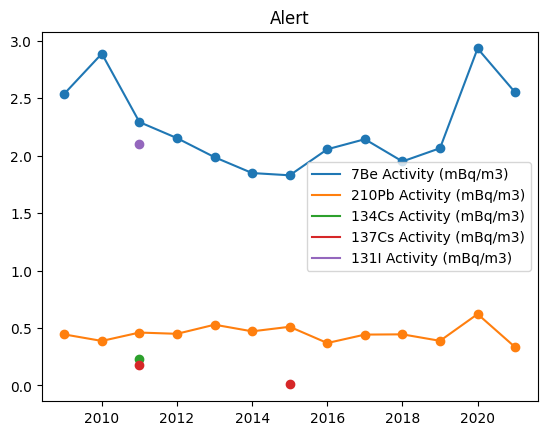

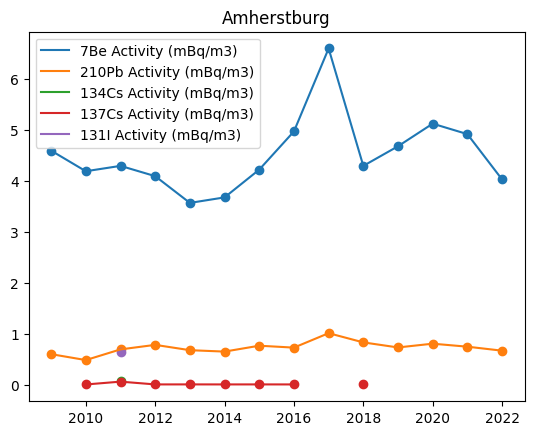

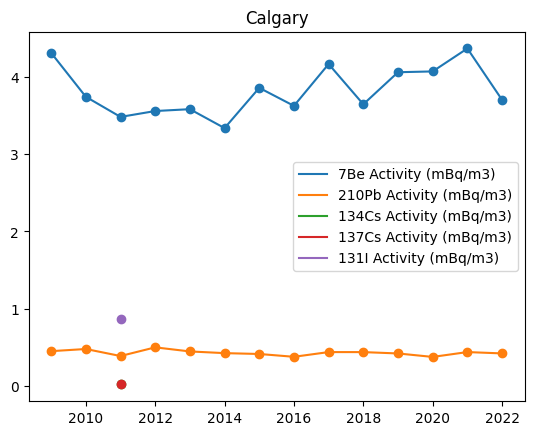

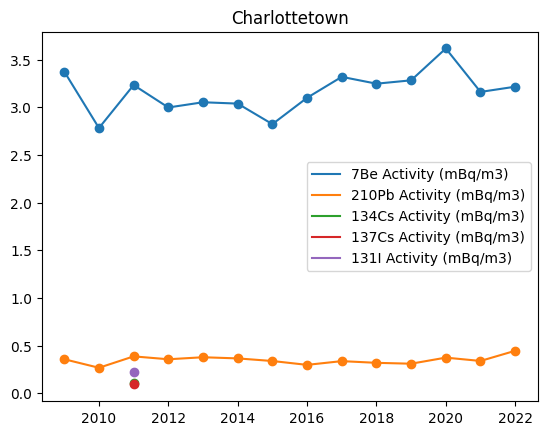

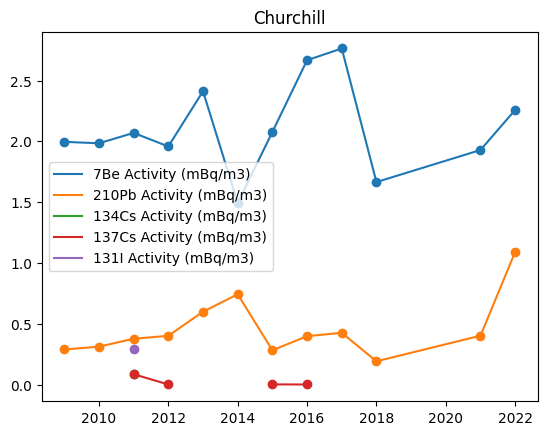

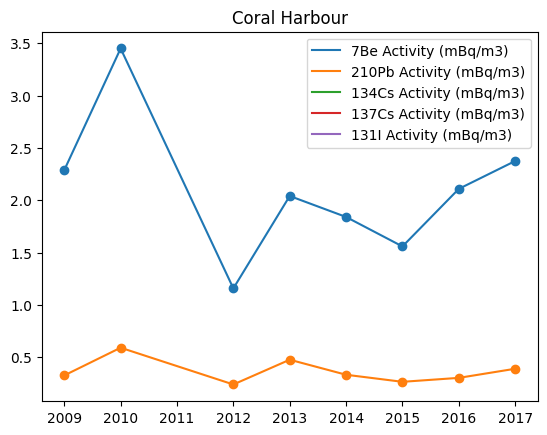

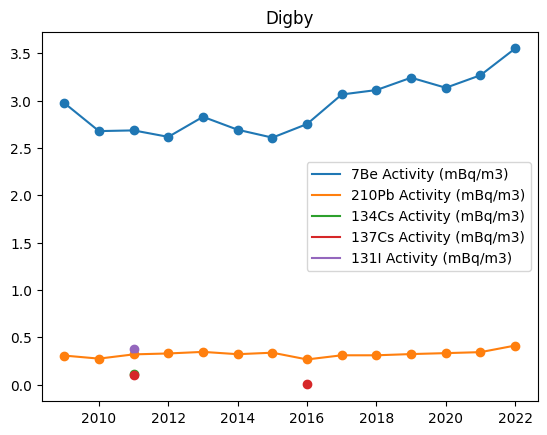

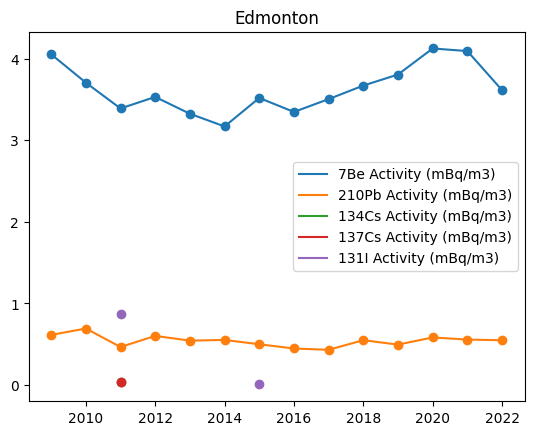

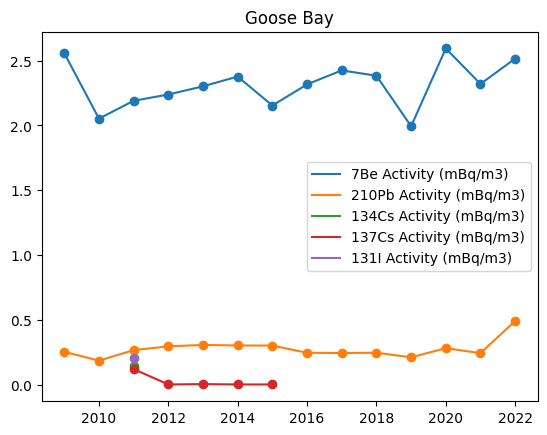

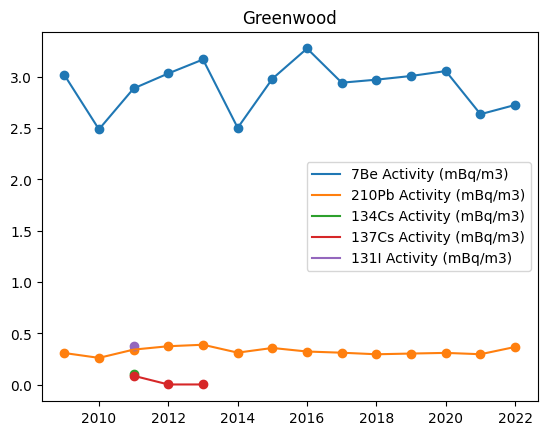

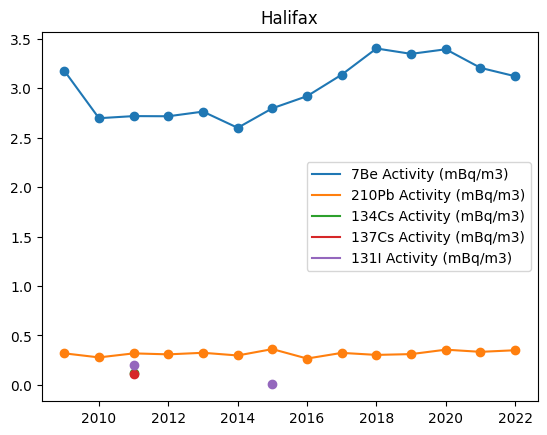

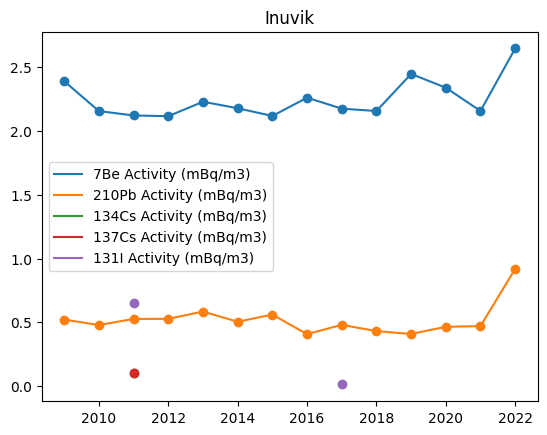

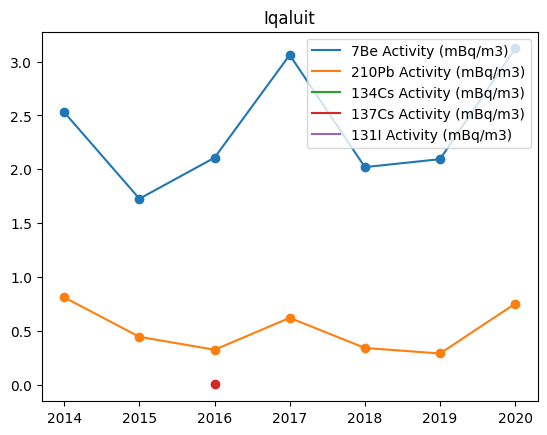

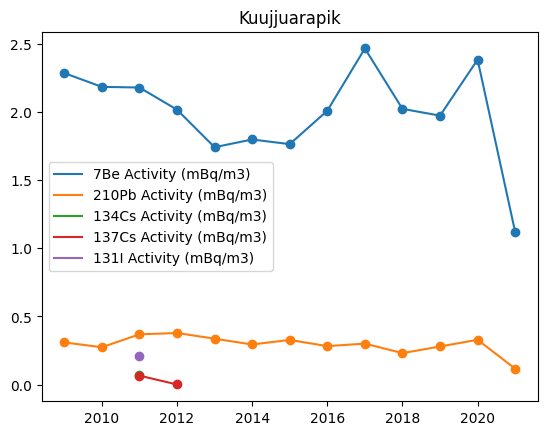

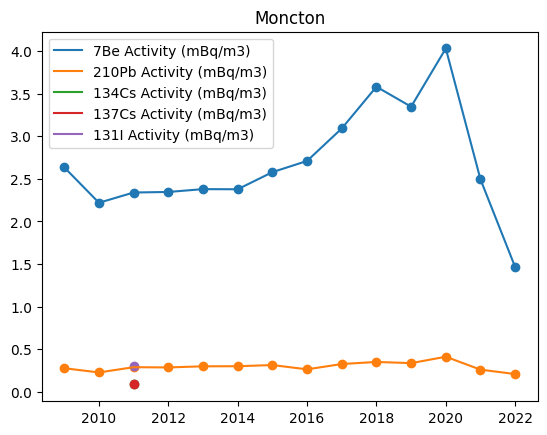

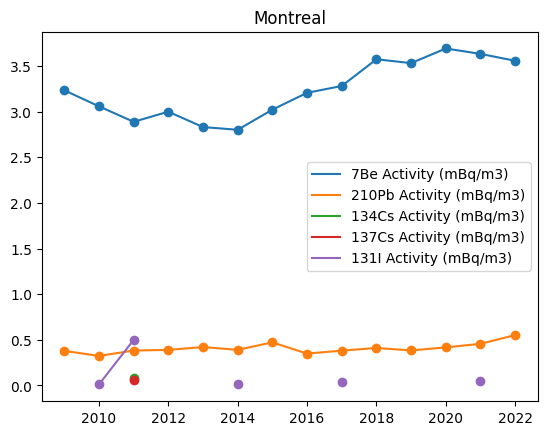

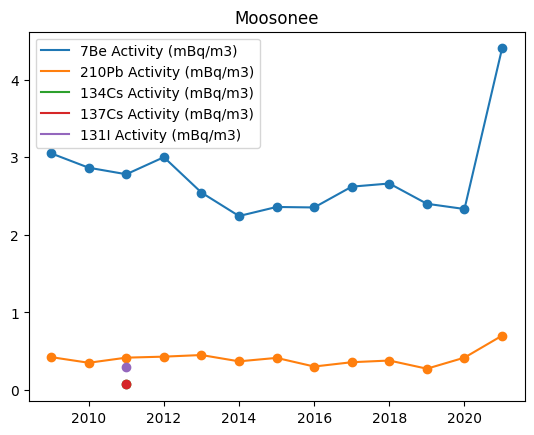

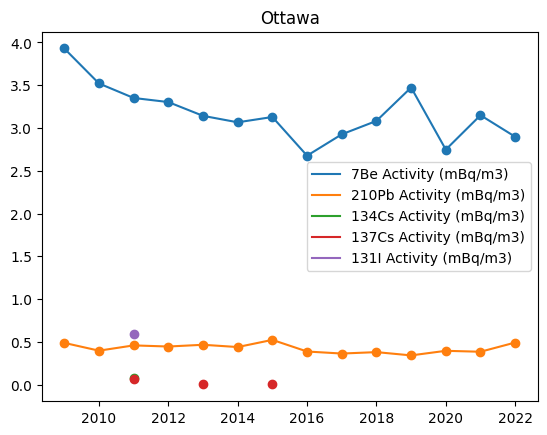

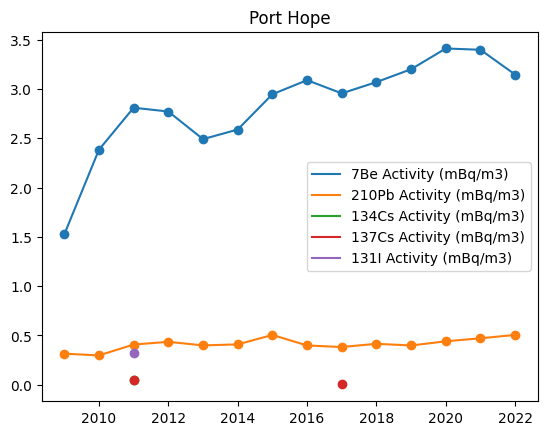

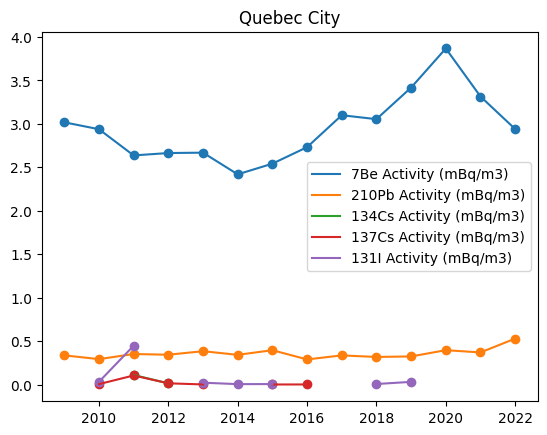

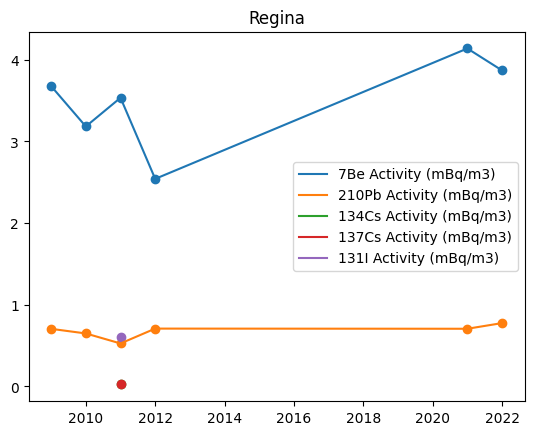

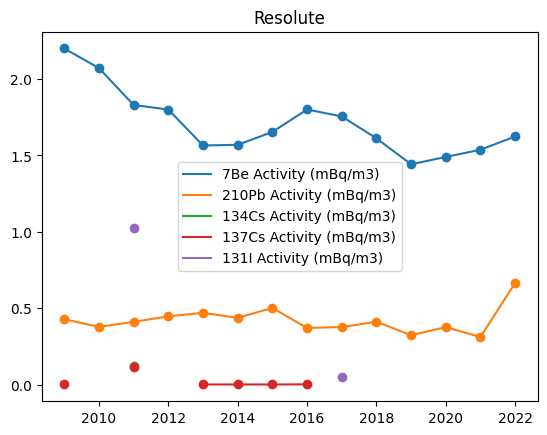

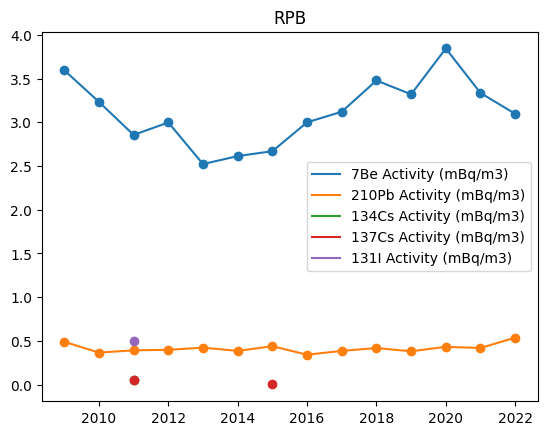

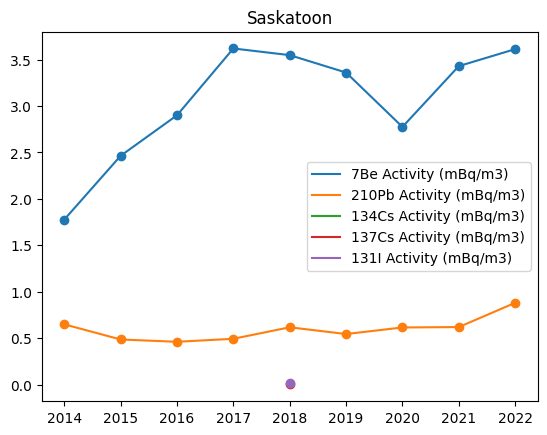

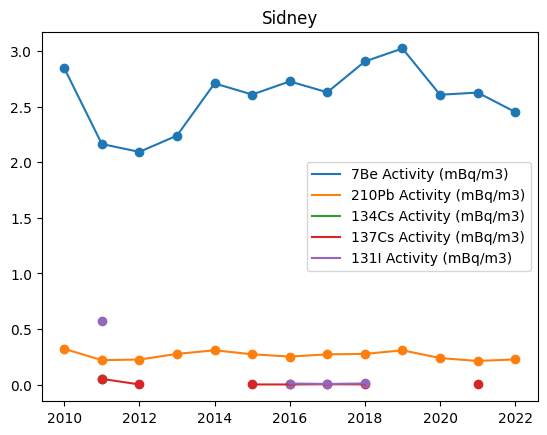

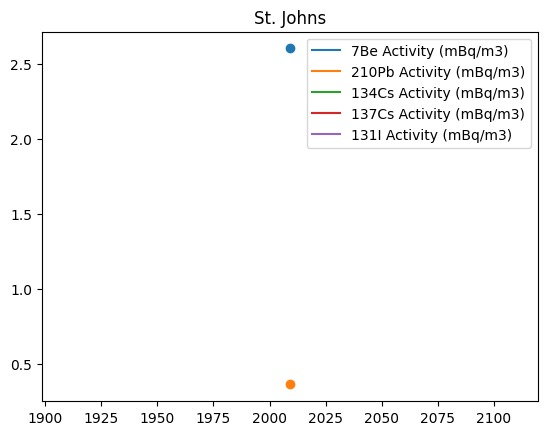

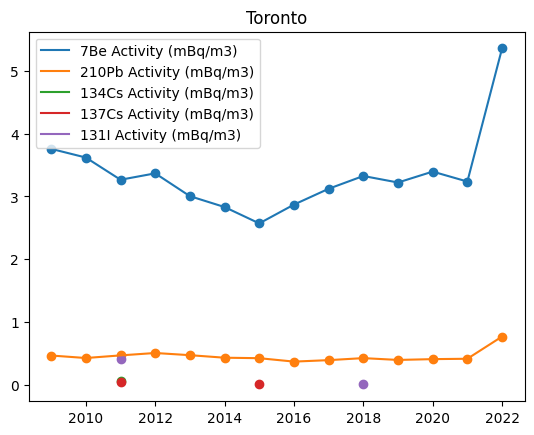

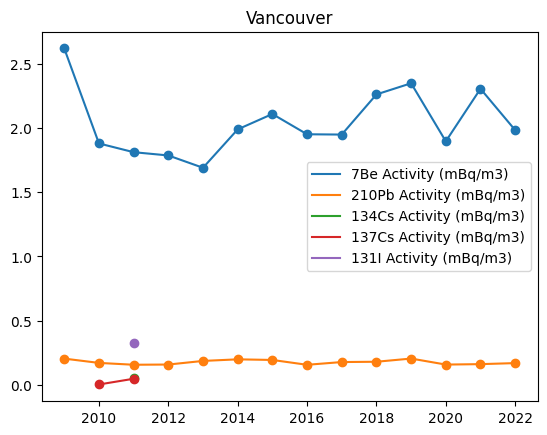

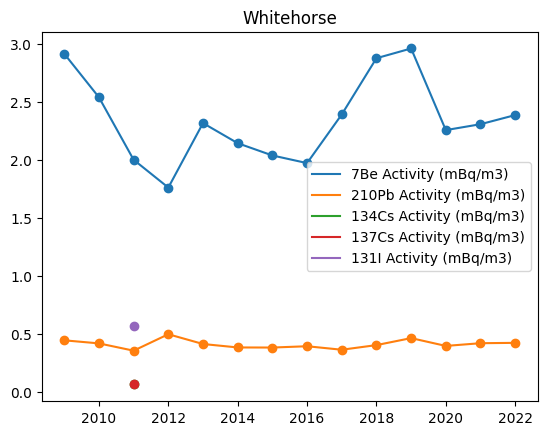

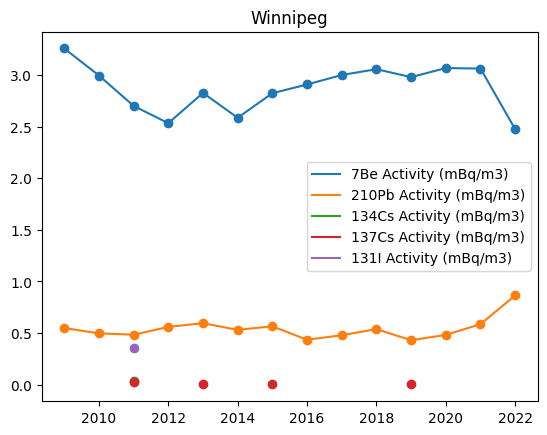

In [ ]:
for i in df_mean['Location'].unique():
  dv=df_mean[df_mean['Location']==i]
  x=dv['Collection Year']
  for j in range(2,len(df_mean.columns),3):
    y=dv.iloc[:,[j]]
    plt.scatter(x,y)
    plt.plot(x,y, label=df_mean.columns[j])
    plt.legend()
  plt.title(i)
  plt.show()

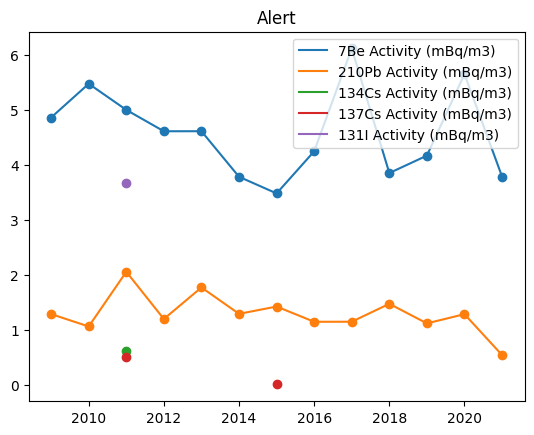

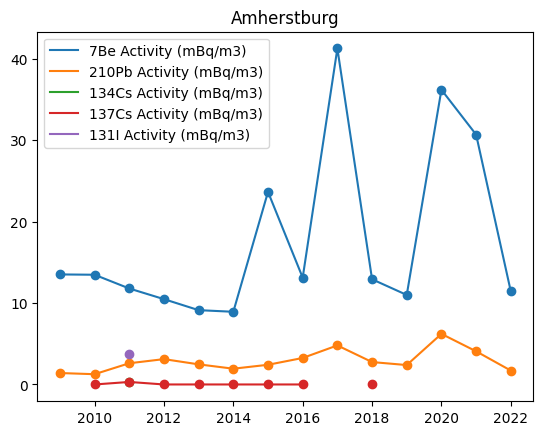

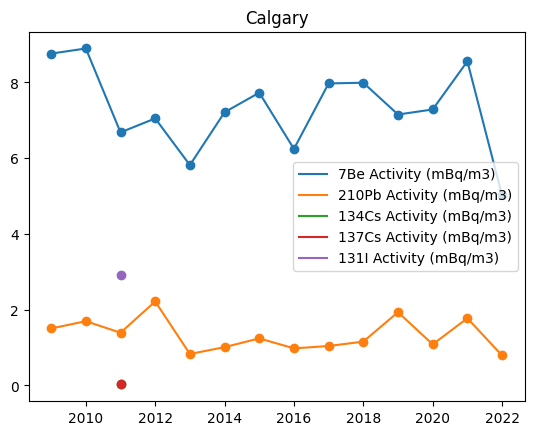

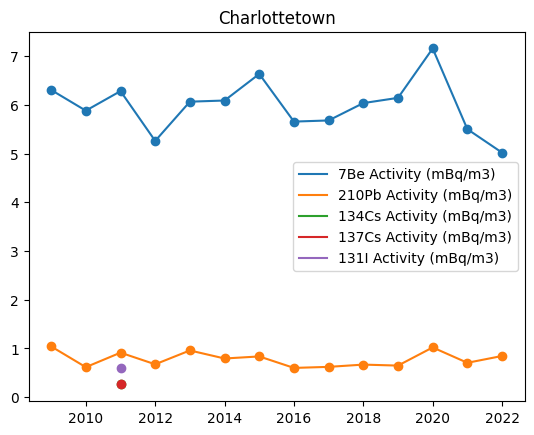

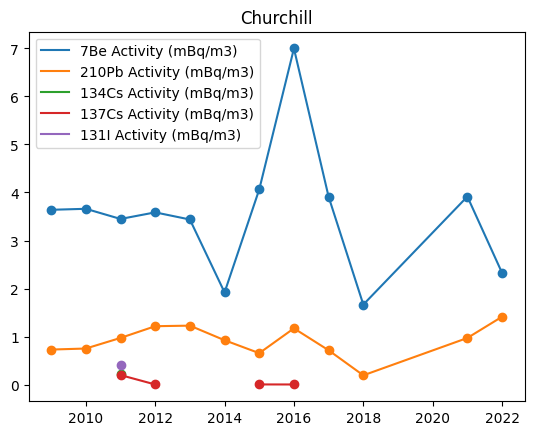

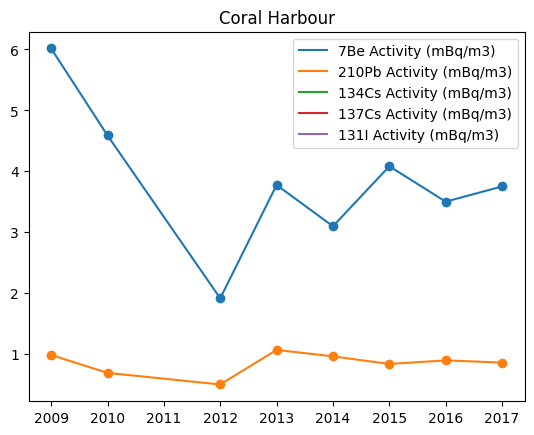

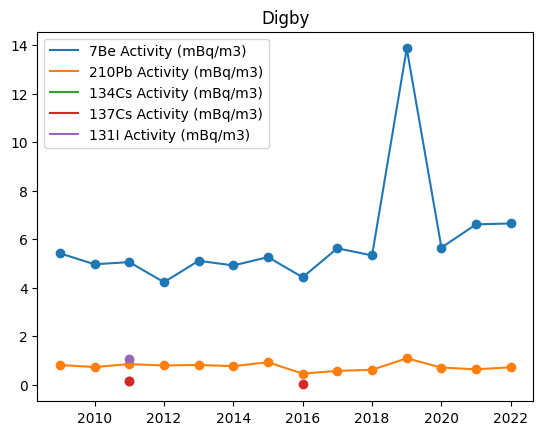

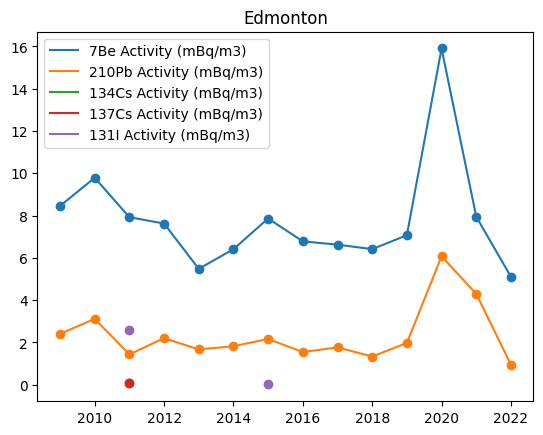

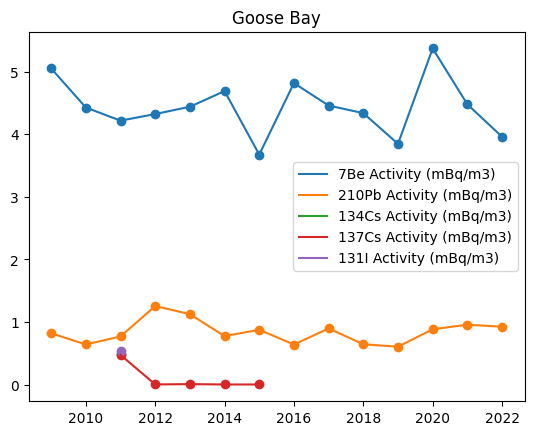

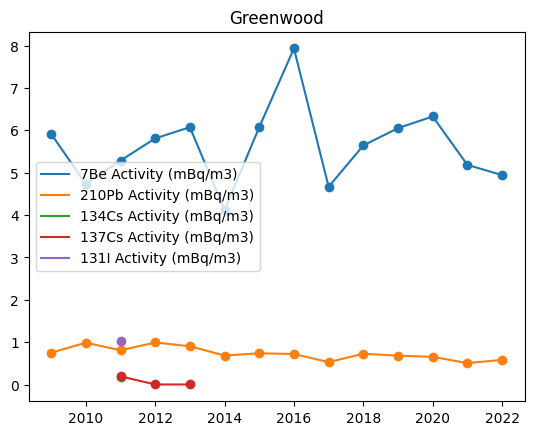

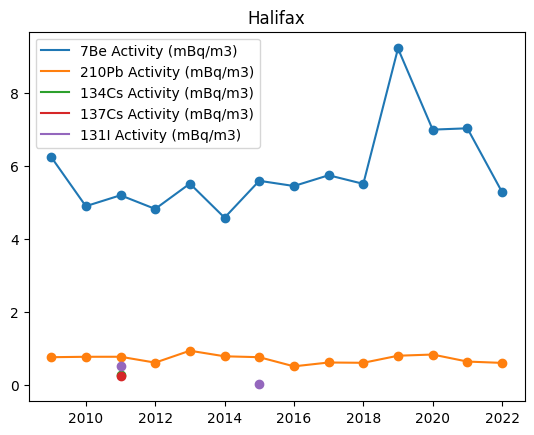

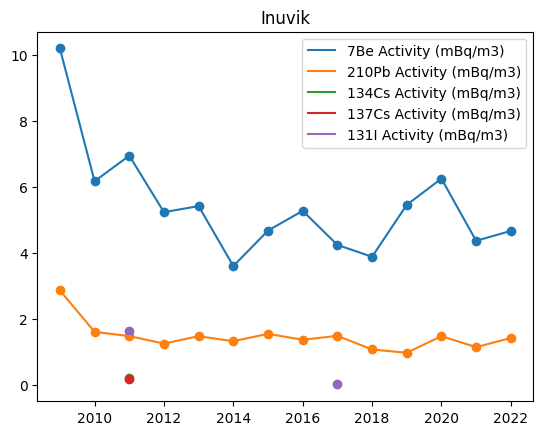

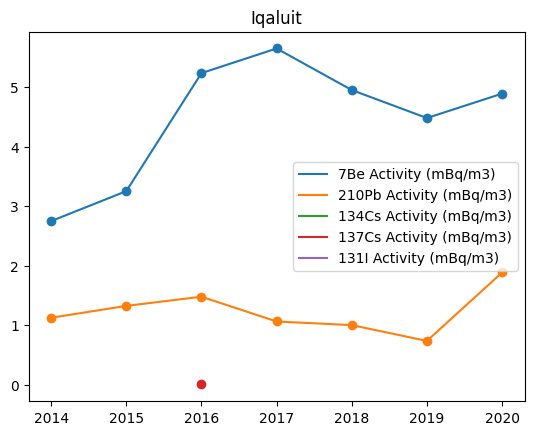

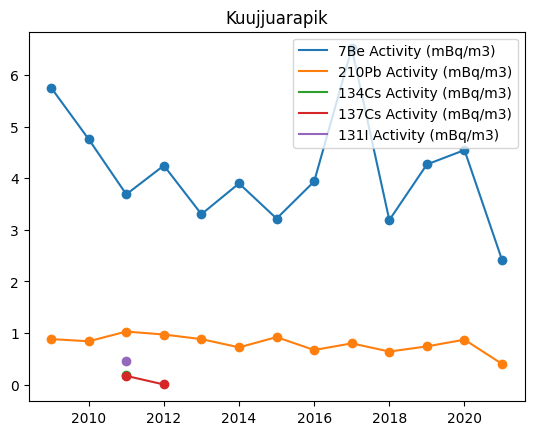

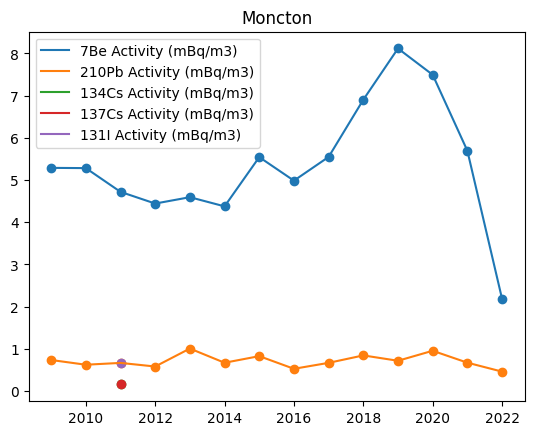

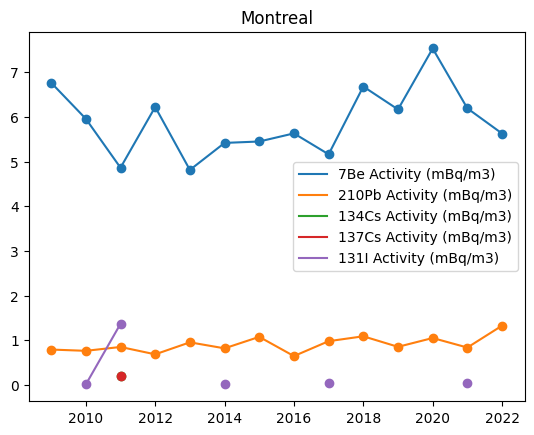

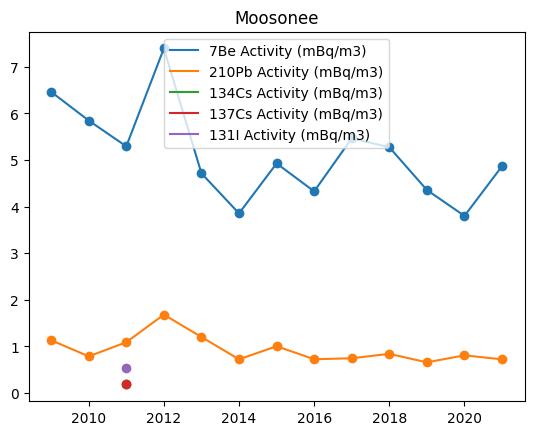

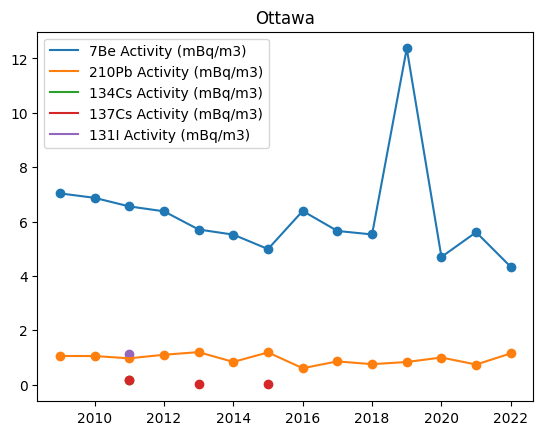

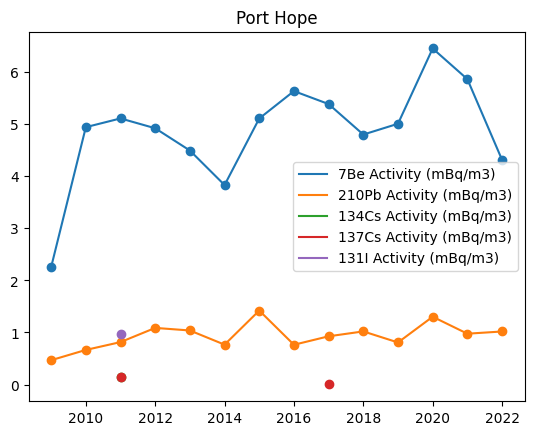

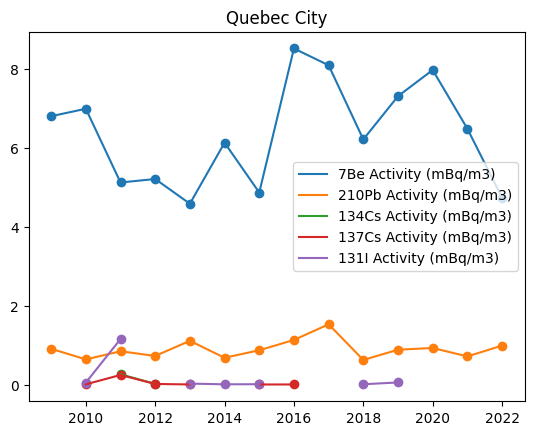

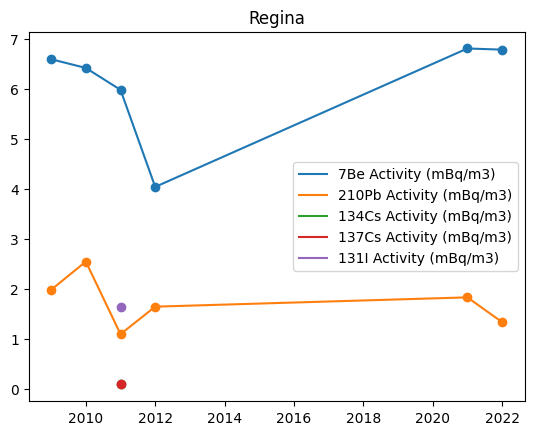

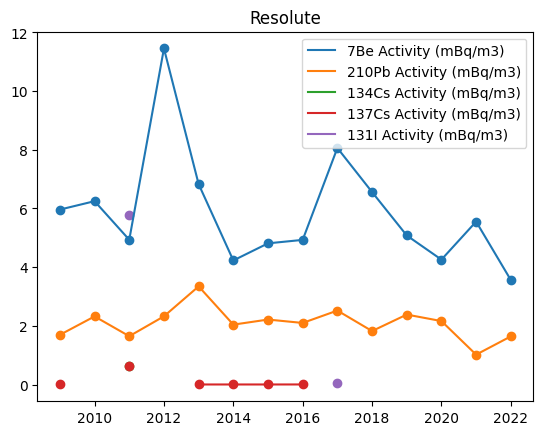

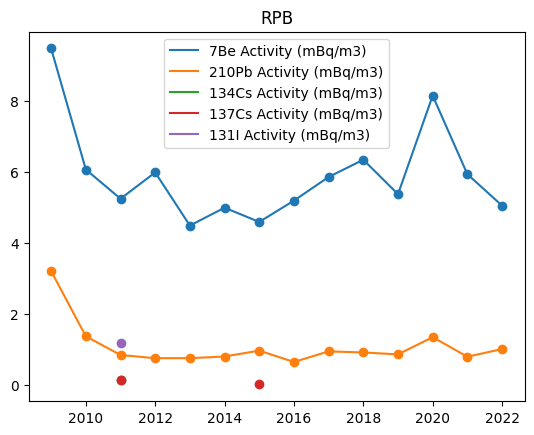

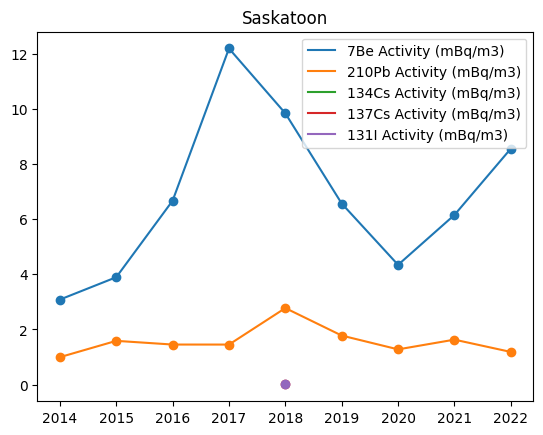

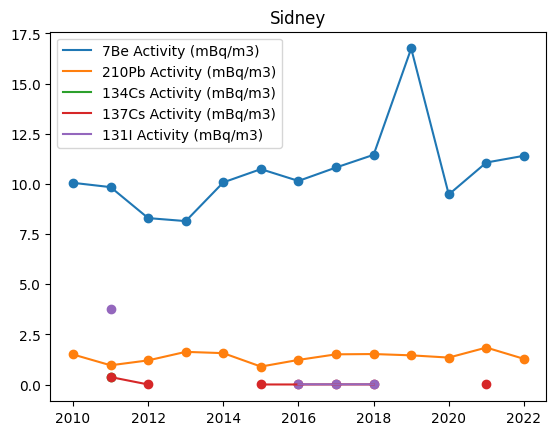

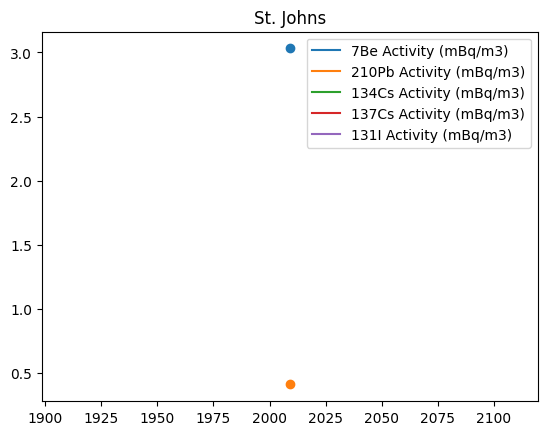

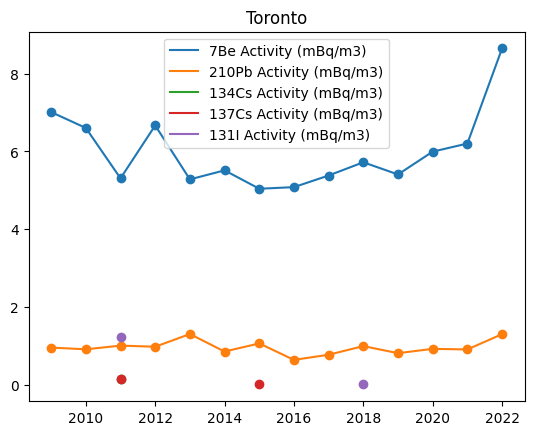

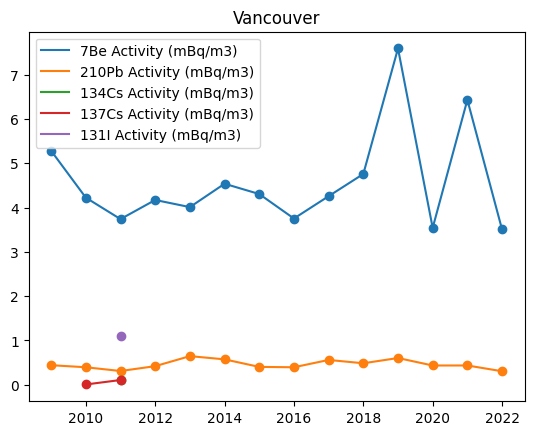

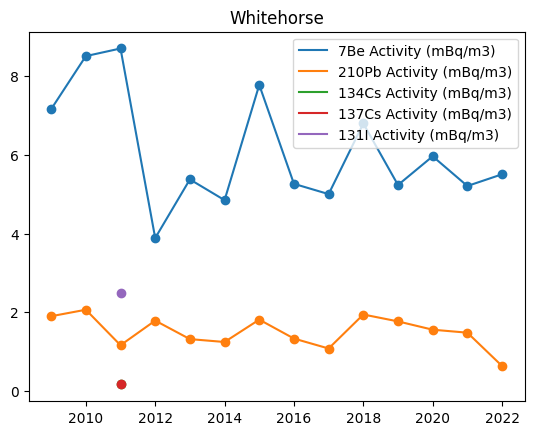

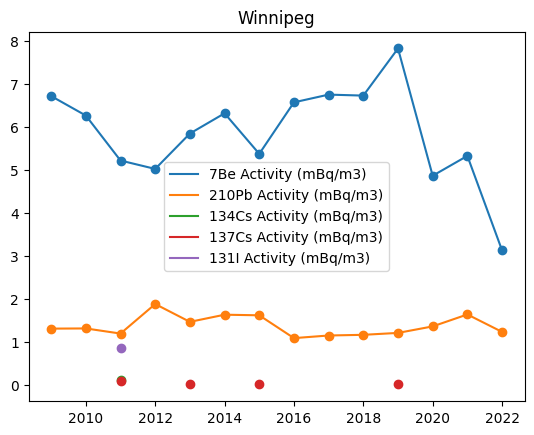

In [ ]:
for i in df_max['Location'].unique():
  dv=df_max[df_max['Location']==i]
  x=dv['Collection Year']
  for j in range(2,len(df_max.columns),3):
    y=dv.iloc[:,[j]]
    plt.scatter(x,y)
    plt.plot(x,y, label=df_max.columns[j])
    plt.legend()
  plt.title(i)
  plt.show()

In [ ]:
dfm_mean=pd.DataFrame(columns=data.columns).drop(['Collection Year'],axis=1)
for i in range(len(town)):
  u=town[i].drop(['Collection Year'],axis=1)
  v=u.iloc[1,0]
  dy=[v]
  for k in u.columns.unique()[1:]:
    c=u[u['Location']==v][k].mean()
    dy+=[c]
  dfm_mean.loc[len(dfm_mean)]=dy
#dfm_mean

In [ ]:
dfm_std=pd.DataFrame(columns=data.columns).drop(['Collection Year'],axis=1)
for i in range(len(town)):
  u=town[i].drop(['Collection Year'],axis=1)
  v=u.iloc[1,0]
  dy=[v]
  for k in u.columns.unique()[1:]:
    c=u[u['Location']==v][k].std()
    dy+=[c]
  dfm_std.loc[len(dfm_std)]=dy
#dfm_std

In [ ]:
dfm_max=pd.DataFrame(columns=data.columns).drop(['Collection Year'],axis=1)
for i in range(len(town)):
  u=town[i].drop(['Collection Year'],axis=1)
  v=u.iloc[1,0]
  dy=[v]
  for k in u.columns.unique()[1:]:
    c=u[u['Location']==v][k].max()
    dy+=[c]
  dfm_max.loc[len(dfm_max)]=dy
#dfm_max

In [ ]:
dfm_mean.columns[1]

'7Be Activity (mBq/m3)'

<Figure size 640x480 with 0 Axes>

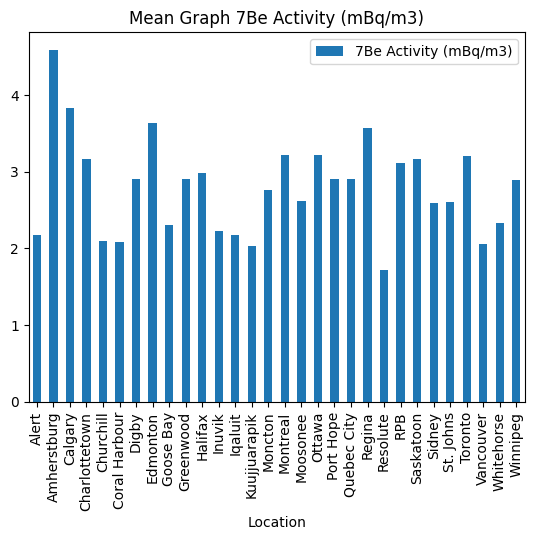

<Figure size 640x480 with 0 Axes>

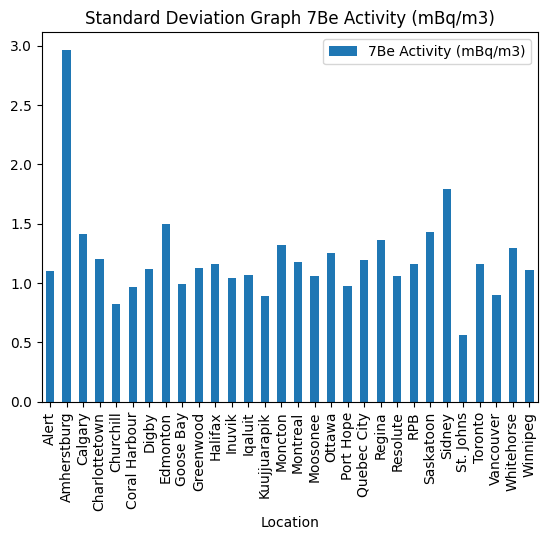

<Figure size 640x480 with 0 Axes>

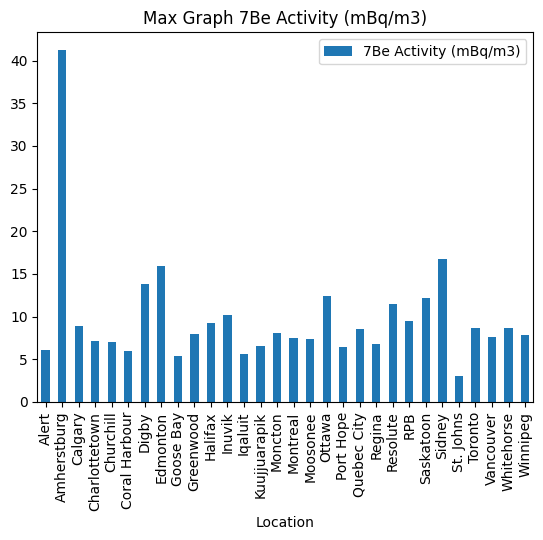

<Figure size 640x480 with 0 Axes>

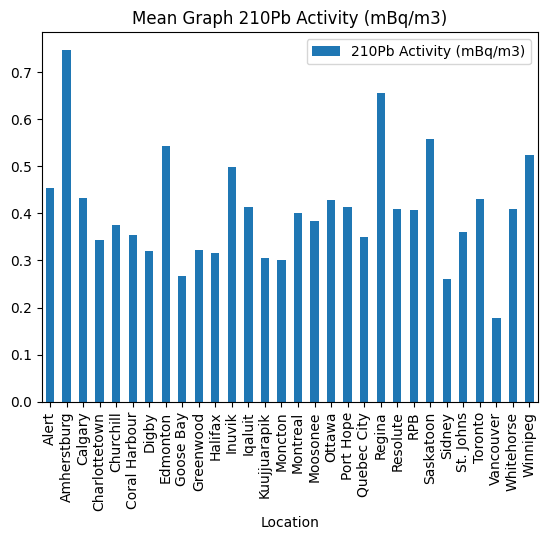

<Figure size 640x480 with 0 Axes>

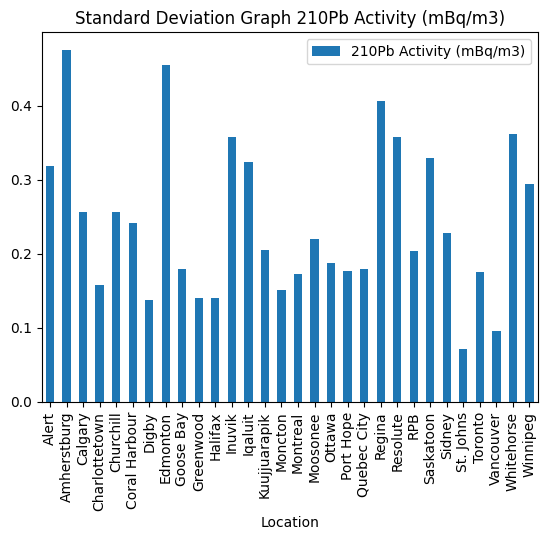

<Figure size 640x480 with 0 Axes>

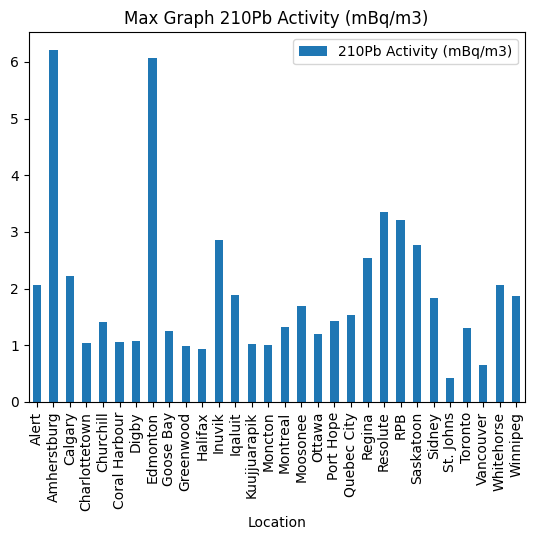

<Figure size 640x480 with 0 Axes>

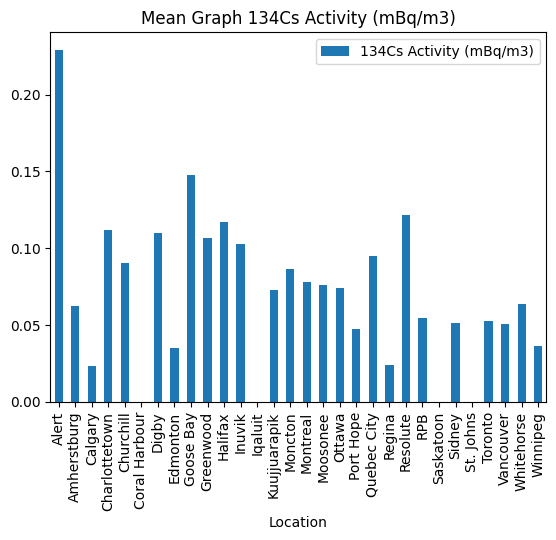

<Figure size 640x480 with 0 Axes>

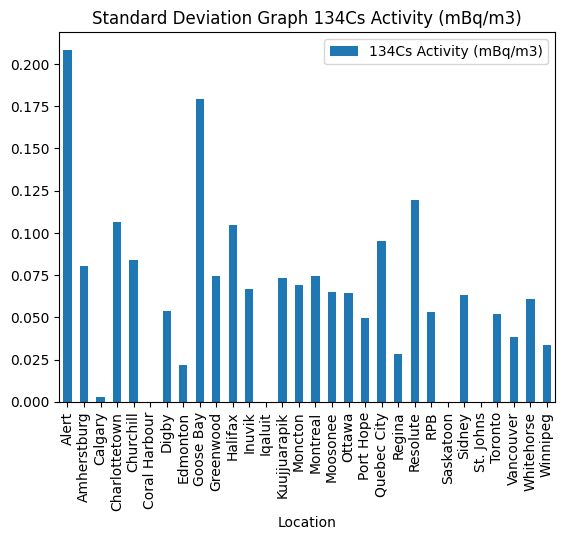

<Figure size 640x480 with 0 Axes>

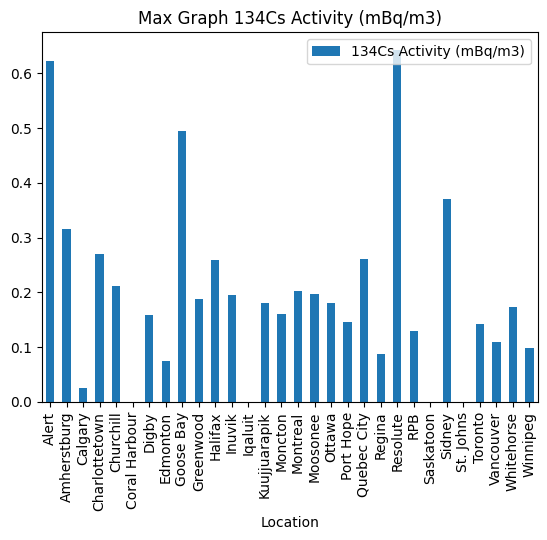

<Figure size 640x480 with 0 Axes>

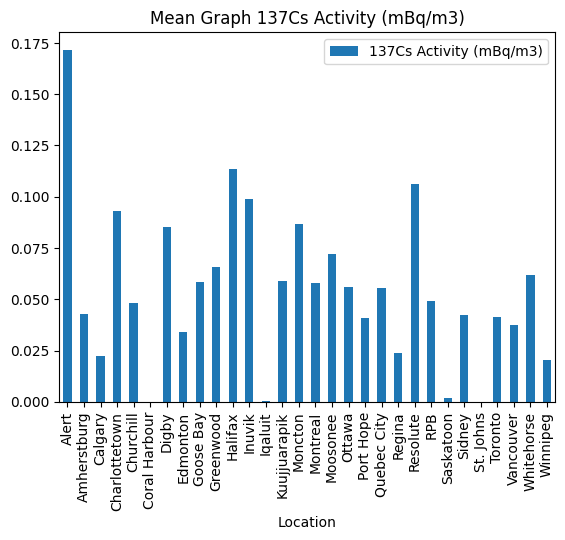

<Figure size 640x480 with 0 Axes>

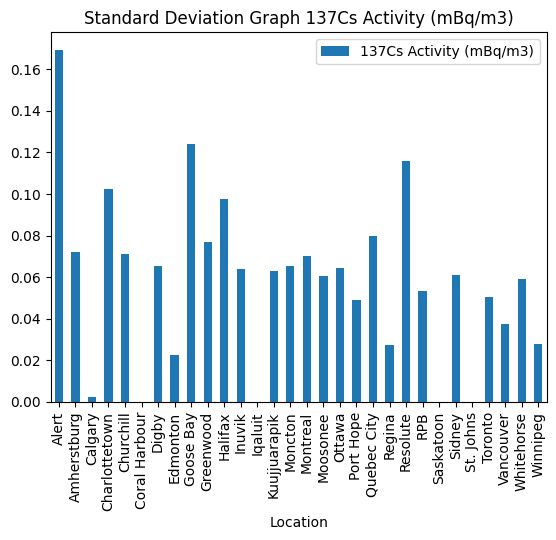

<Figure size 640x480 with 0 Axes>

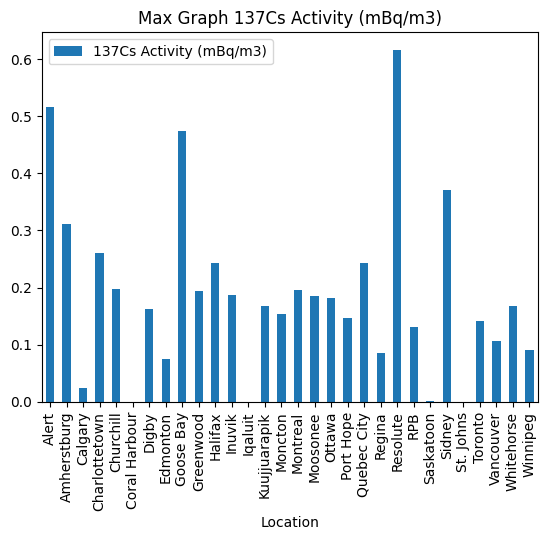

<Figure size 640x480 with 0 Axes>

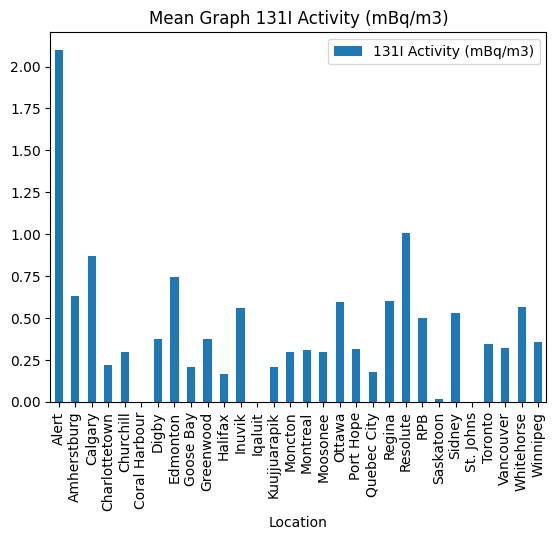

<Figure size 640x480 with 0 Axes>

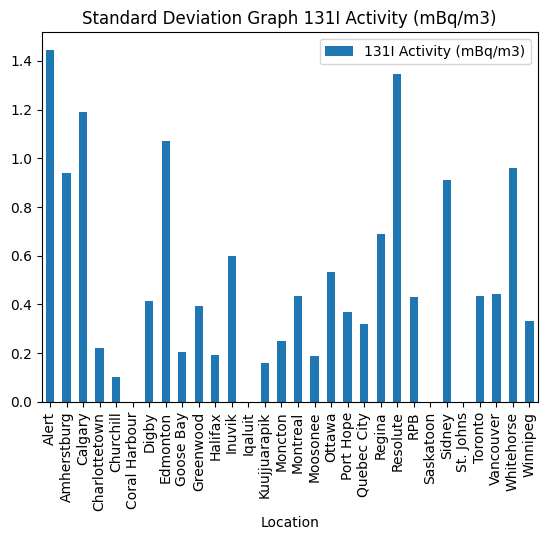

<Figure size 640x480 with 0 Axes>

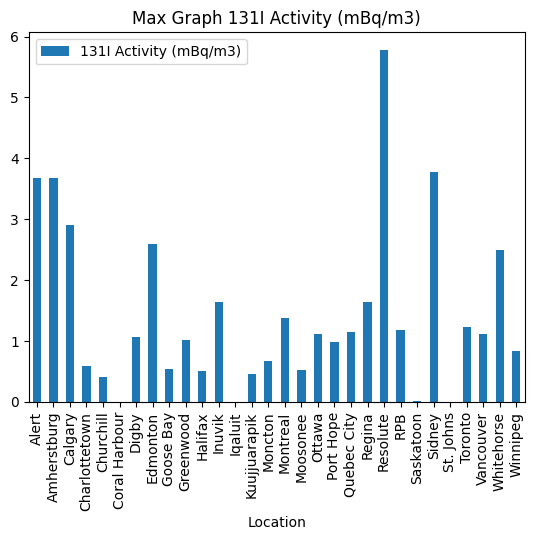

In [ ]:
for i in range(1,14,3):
  dqm=dfm_mean.iloc[:,[0,i]]
  plt.figure()
  dqm.plot(x='Location',
           kind='bar',
           stacked=False,
           title=f'Mean Graph {dfm_mean.columns[i]}')
  plt.savefig(f'Mean Graph {i}.png',bbox_inches='tight')
  dqm=dfm_std.iloc[:,[0,i]]
  plt.figure()
  dqm.plot(x='Location',
           kind='bar',
           stacked=False,title=f'Standard Deviation Graph {dfm_mean.columns[i]}')
  plt.savefig(f'Standard Deviation Graph {i}.png',bbox_inches='tight')
  plt.figure()
  dqm=dfm_max.iloc[:,[0,i]]
  dqm.plot(x='Location',
           kind='bar',
           stacked=False,
           title=f'Max Graph {dfm_mean.columns[i]}')
  plt.savefig(f'Max Graph {i}.png',bbox_inches='tight')

In [ ]:
df_mean.columns

Index(['Location', 'Collection Year', '7Be Activity (mBq/m3)',
       '7Be Uncertainty (mBq/m3)', '7Be MDC (mBq/m3)',
       '210Pb Activity (mBq/m3)', '210Pb Uncertainty (mBq/m3)',
       '210Pb MDC (mBq/m3)', '134Cs Activity (mBq/m3)',
       '134Cs Uncertainty (mBq/m3)', '134Cs MDC (mBq/m3)',
       '137Cs Activity (mBq/m3)', '137Cs Uncertainty (mBq/m3)',
       '137Cs MDC (mBq/m3)', '131I Activity (mBq/m3)',
       '131I Uncertainty (mBq/m3)', '131I MDC (mBq/m3)'],
      dtype='object')

In [ ]:
dp=dfm_mean.copy().iloc[:,:2]
lat1=[82.508453,42.101379,51.049999,46.238888,58.768410, 64.1893,44.6200,53.631611,53.3182,49.091110,44.651070,68.360741,63.748611,55.274570,46.090946]
lon1=[-62.410526,-83.108696,-114.06666,-63.129166,-94.164963,-83.3557,-65.7563,-113.323975,-60.4222,-118.676941,-63.582687,-133.723022,-68.519722,-77.763786,-64.790497]
lat2=[45.508888,51.273090,45.424721,43.9700,46.829853,50.4528,74.6833,43.194019,52.146973,48.650241,47.560539,43.651070,49.246292,60.721188,49.895077]
lon2=[-73.561668,-80.640053,-75.6950,-78.4370,-71.254028,-104.6040,-94.867,-80.384499,-106.647034,-123.399005,-52.712830,-79.347015,-123.116226,-135.056839,-97.138451]
lat=lat1+lat2
lon=lon1+lon2
dp['Latitude']=lat
dp['Longitude']=lon
dp

Location  7Be Activity (mBq/m3)   Latitude   Longitude
0           Alert               2.179119  82.508453  -62.410526
1     Amherstburg               4.589517  42.101379  -83.108696
2         Calgary               3.827158  51.049999 -114.066660
3   Charlottetown               3.162164  46.238888  -63.129166
4       Churchill               2.102935  58.768410  -94.164963
5   Coral Harbour               2.087947  64.189300  -83.355700
6           Digby               2.906969  44.620000  -65.756300
7        Edmonton               3.629680  53.631611 -113.323975
8       Goose Bay               2.305922  53.318200  -60.422200
9       Greenwood               2.910653  49.091110 -118.676941
10        Halifax               2.983364  44.651070  -63.582687
11         Inuvik               2.229011  68.360741 -133.723022
12        Iqaluit               2.178096  63.748611  -68.519722
13   Kuujjuarapik               2.032646  55.274570  -77.763786
14        Moncton               2.760463  46.090946  -64.790497
15       Montreal               3.217988  45.508888  -73.561668
16       Moosonee               2.618692  51.273090  -80.640053
17         Ottawa               3.220509  45.424721  -75.695000
18      Port Hope               2.911773  43.970000  -78.437000
19    Quebec City               2.905782  46.829853  -71.254028
20         Regina               3.570813  50.452800 -104.604000
21       Resolute               1.718810  74.683300  -94.867000
22            RPB               3.108563  43.194019  -80.384499
23      Saskatoon               3.161783  52.146973 -106.647034
24         Sidney               2.589907  48.650241 -123.399005
25      St. Johns               2.603679  47.560539  -52.712830
26        Toronto               3.210760  43.651070  -79.347015
27      Vancouver               2.053597  49.246292 -123.116226
28     Whitehorse               2.336289  60.721188 -135.056839
29       Winnipeg               2.897602  49.895077  -97.138451

In [ ]:
!pip install matplotlib basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


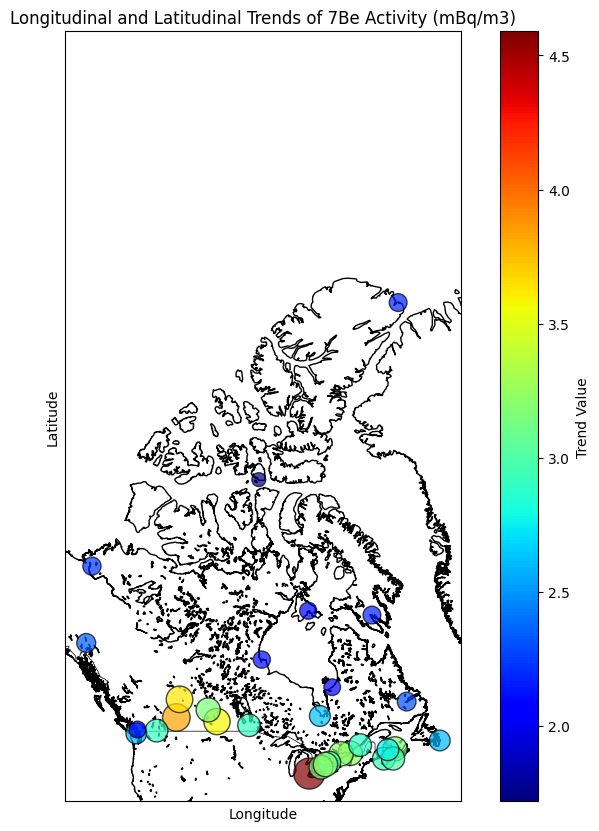

In [ ]:
trend_values = dp['7Be Activity (mBq/m3)']
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Combine the latitude and longitude lists
lat1 = [82.508453, 42.101379, 51.049999, 46.238888, 58.768410, 64.1893, 44.6200, 53.631611, 53.3182, 49.091110, 44.651070, 68.360741, 63.748611, 55.274570, 46.090946]
lon1 = [-62.410526, -83.108696, -114.06666, -63.129166, -94.164963, -83.3557, -65.7563, -113.323975, -60.4222, -118.676941, -63.582687, -133.723022, -68.519722, -77.763786, -64.790497]
lat2 = [45.508888, 51.273090, 45.424721, 43.9700, 46.829853, 50.4528, 74.6833, 43.194019, 52.146973, 48.650241, 47.560539, 43.651070, 49.246292, 60.721188, 49.895077]
lon2 = [-73.561668, -80.640053, -75.6950, -78.4370, -71.254028, -104.6040, -94.867, -80.384499, -106.647034, -123.399005, -52.712830, -79.347015, -123.116226, -135.056839, -97.138451]

lat = lat1 + lat2
lon = lon1 + lon2

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Create a Basemap object centered on the entire dataset
map = Basemap(
    projection="merc",
    llcrnrlat=min(lat) - 5,  # Add some padding to the minimum latitude
    urcrnrlat=max(lat) + 5,  # Add some padding to the maximum latitude
    llcrnrlon=min(lon) - 5,  # Add some padding to the minimum longitude
    urcrnrlon=max(lon) + 5,  # Add some padding to the maximum longitude
    resolution="i"
)

# Draw coastlines and country boundaries
map.drawcoastlines()
map.drawcountries()

# Normalize the trend values to determine the size and color range
min_size = 10  # minimum circle size
max_size = 50  # maximum circle size
min_value = min(trend_values)
max_value = max(trend_values)
norm_size = plt.Normalize(min_value, max_value)
norm_color = plt.Normalize(min_value, max_value)

# Convert trend values to sizes and colors
sizes = norm_size(trend_values)
sizes = 10*(min_size + (sizes * (max_size - min_size))) # rescale sizes to desired range
colors = norm_color(trend_values)

# Convert lat/lon to map coordinates
x, y = map(lon, lat)

# Plot the data points on the map with size and color proportional to the trend values
map.scatter(x, y, s=sizes, c=colors, cmap="jet", alpha=0.7, edgecolors="k", linewidth=1, zorder=10)

# Add a colorbar to indicate the trend value range
sm = plt.cm.ScalarMappable(cmap="jet", norm=norm_color)
sm.set_array([])  # An array-like object is needed for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Trend Value")

# Add title and labels
plt.title("Longitudinal and Latitudinal Trends of 7Be Activity (mBq/m3)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


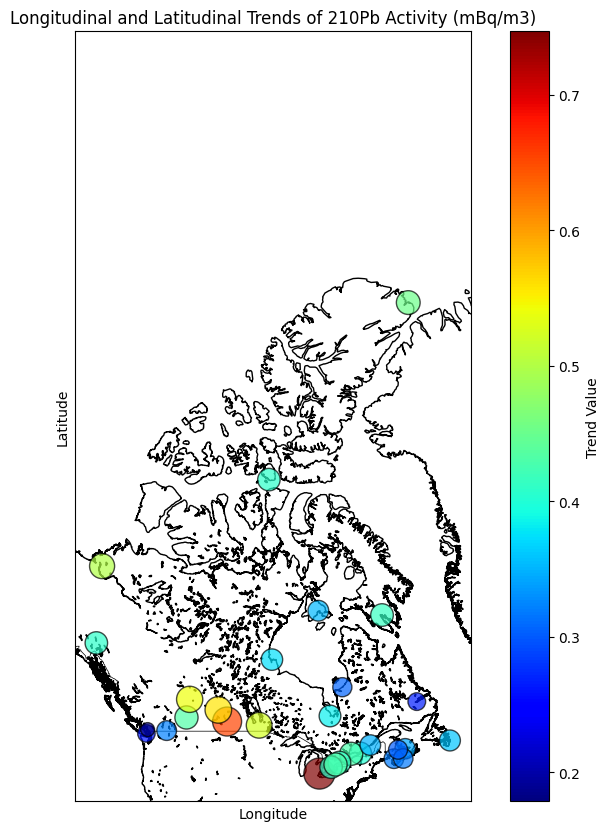

In [ ]:
dp1=dfm_mean.copy().iloc[:,[0,4]]
dp1['Latitude']=lat
dp1['Longitude']=lon
trend_values = dp1['210Pb Activity (mBq/m3)']
fig, ax = plt.subplots(figsize=(10, 10))

# Create a Basemap object centered on the entire dataset
map = Basemap(
    projection="merc",
    llcrnrlat=min(lat) - 5,  # Add some padding to the minimum latitude
    urcrnrlat=max(lat) + 5,  # Add some padding to the maximum latitude
    llcrnrlon=min(lon) - 5,  # Add some padding to the minimum longitude
    urcrnrlon=max(lon) + 5,  # Add some padding to the maximum longitude
    resolution="i"
)

# Draw coastlines and country boundaries
map.drawcoastlines()
map.drawcountries()

# Normalize the trend values to determine the size and color range
min_size = 10  # minimum circle size
max_size = 50  # maximum circle size
min_value = min(trend_values)
max_value = max(trend_values)
norm_size = plt.Normalize(min_value, max_value)
norm_color = plt.Normalize(min_value, max_value)

# Convert trend values to sizes and colors
sizes = norm_size(trend_values)
sizes = 10*(min_size + (sizes * (max_size - min_size))) # rescale sizes to desired range
colors = norm_color(trend_values)

# Convert lat/lon to map coordinates
x, y = map(lon, lat)

# Plot the data points on the map with size and color proportional to the trend values
map.scatter(x, y, s=sizes, c=colors, cmap="jet", alpha=0.7, edgecolors="k", linewidth=1, zorder=10)

# Add a colorbar to indicate the trend value range
sm = plt.cm.ScalarMappable(cmap="jet", norm=norm_color)
sm.set_array([])  # An array-like object is needed for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Trend Value")

# Add title and labels
plt.title("Longitudinal and Latitudinal Trends of 210Pb Activity (mBq/m3)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


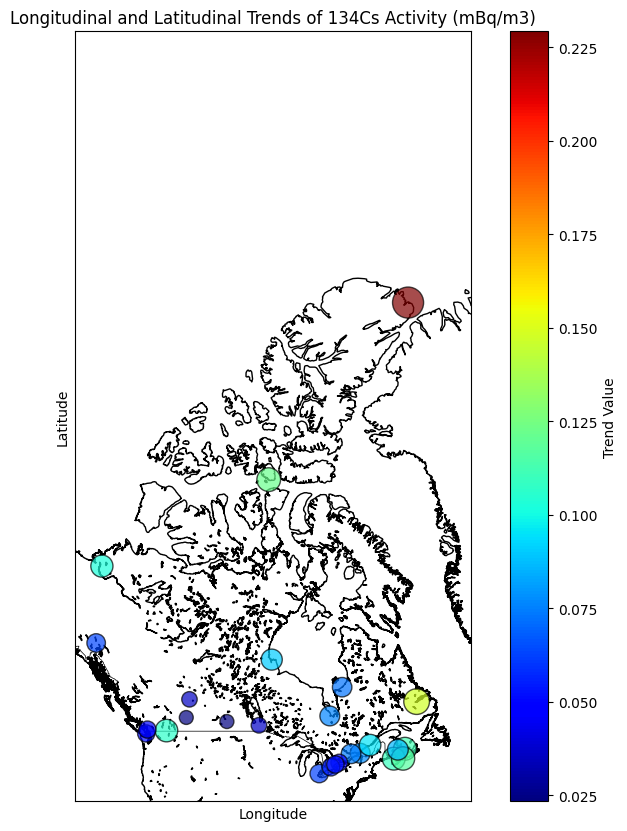

In [ ]:
dp2=dfm_mean.copy().iloc[:,[0,7]]
dp2['Latitude']=lat
dp2['Longitude']=lon
trend_values = dp2['134Cs Activity (mBq/m3)']
fig, ax = plt.subplots(figsize=(10, 10))

# Create a Basemap object centered on the entire dataset
map = Basemap(
    projection="merc",
    llcrnrlat=min(lat) - 5,  # Add some padding to the minimum latitude
    urcrnrlat=max(lat) + 5,  # Add some padding to the maximum latitude
    llcrnrlon=min(lon) - 5,  # Add some padding to the minimum longitude
    urcrnrlon=max(lon) + 5,  # Add some padding to the maximum longitude
    resolution="i"
)

# Draw coastlines and country boundaries
map.drawcoastlines()
map.drawcountries()

# Normalize the trend values to determine the size and color range
min_size = 10  # minimum circle size
max_size = 50  # maximum circle size
min_value = min(trend_values)
max_value = max(trend_values)
norm_size = plt.Normalize(min_value, max_value)
norm_color = plt.Normalize(min_value, max_value)

# Convert trend values to sizes and colors
sizes = norm_size(trend_values)
sizes = 10*(min_size + (sizes * (max_size - min_size))) # rescale sizes to desired range
colors = norm_color(trend_values)

# Convert lat/lon to map coordinates
x, y = map(lon, lat)

# Plot the data points on the map with size and color proportional to the trend values
map.scatter(x, y, s=sizes, c=colors, cmap="jet", alpha=0.7, edgecolors="k", linewidth=1, zorder=10)

# Add a colorbar to indicate the trend value range
sm = plt.cm.ScalarMappable(cmap="jet", norm=norm_color)
sm.set_array([])  # An array-like object is needed for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Trend Value")

# Add title and labels
plt.title("Longitudinal and Latitudinal Trends of 134Cs Activity (mBq/m3)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

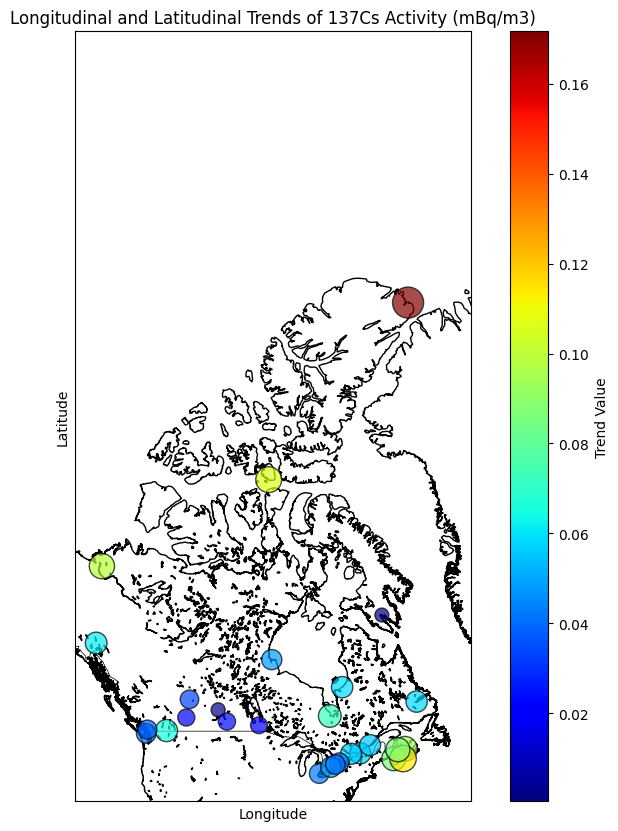

In [ ]:
dp3=dfm_mean.copy().iloc[:,[0,10]]
dp3['Latitude']=lat
dp3['Longitude']=lon
trend_values = dp3['137Cs Activity (mBq/m3)']
fig, ax = plt.subplots(figsize=(10, 10))

# Create a Basemap object centered on the entire dataset
map = Basemap(
    projection="merc",
    llcrnrlat=min(lat) - 5,  # Add some padding to the minimum latitude
    urcrnrlat=max(lat) + 5,  # Add some padding to the maximum latitude
    llcrnrlon=min(lon) - 5,  # Add some padding to the minimum longitude
    urcrnrlon=max(lon) + 5,  # Add some padding to the maximum longitude
    resolution="i"
)

# Draw coastlines and country boundaries
map.drawcoastlines()
map.drawcountries()

# Normalize the trend values to determine the size and color range
min_size = 10  # minimum circle size
max_size = 50  # maximum circle size
min_value = min(trend_values)
max_value = max(trend_values)
norm_size = plt.Normalize(min_value, max_value)
norm_color = plt.Normalize(min_value, max_value)

# Convert trend values to sizes and colors
sizes = norm_size(trend_values)
sizes = 10*(min_size + (sizes * (max_size - min_size))) # rescale sizes to desired range
colors = norm_color(trend_values)

# Convert lat/lon to map coordinates
x, y = map(lon, lat)

# Plot the data points on the map with size and color proportional to the trend values
map.scatter(x, y, s=sizes, c=colors, cmap="jet", alpha=0.7, edgecolors="k", linewidth=1, zorder=10)

# Add a colorbar to indicate the trend value range
sm = plt.cm.ScalarMappable(cmap="jet", norm=norm_color)
sm.set_array([])  # An array-like object is needed for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Trend Value")

# Add title and labels
plt.title("Longitudinal and Latitudinal Trends of 137Cs Activity (mBq/m3)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


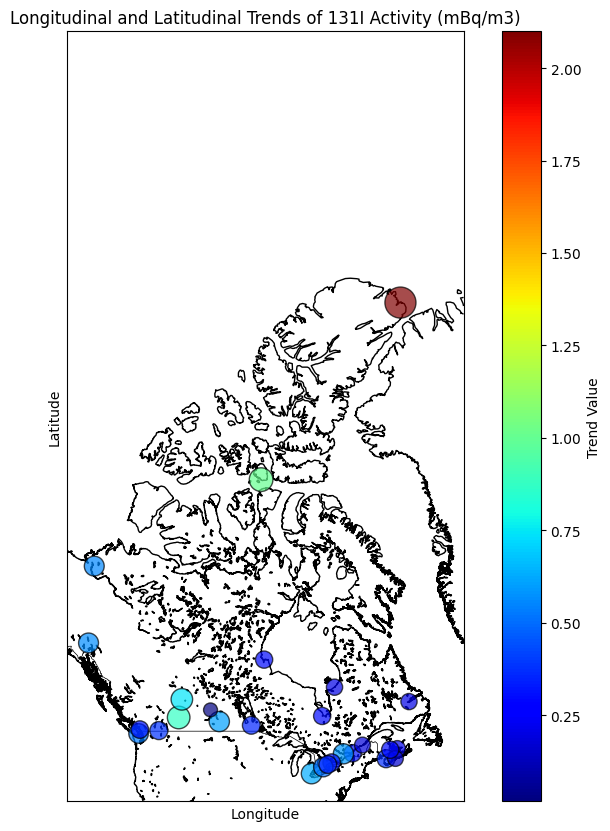

In [ ]:
dp4=dfm_mean.copy().iloc[:,[0,13]]
dp4['Latitude']=lat
dp4['Longitude']=lon
trend_values = dp4['131I Activity (mBq/m3)']
fig, ax = plt.subplots(figsize=(10, 10))

# Create a Basemap object centered on the entire dataset
map = Basemap(
    projection="merc",
    llcrnrlat=min(lat) - 5,  # Add some padding to the minimum latitude
    urcrnrlat=max(lat) + 5,  # Add some padding to the maximum latitude
    llcrnrlon=min(lon) - 5,  # Add some padding to the minimum longitude
    urcrnrlon=max(lon) + 5,  # Add some padding to the maximum longitude
    resolution="i"
)

# Draw coastlines and country boundaries
map.drawcoastlines()
map.drawcountries()

# Normalize the trend values to determine the size and color range
min_size = 10  # minimum circle size
max_size = 50  # maximum circle size
min_value = min(trend_values)
max_value = max(trend_values)
norm_size = plt.Normalize(min_value, max_value)
norm_color = plt.Normalize(min_value, max_value)

# Convert trend values to sizes and colors
sizes = norm_size(trend_values)
sizes = 10*(min_size + (sizes * (max_size - min_size))) # rescale sizes to desired range
colors = norm_color(trend_values)

# Convert lat/lon to map coordinates
x, y = map(lon, lat)

# Plot the data points on the map with size and color proportional to the trend values
map.scatter(x, y, s=sizes, c=colors, cmap="jet", alpha=0.7, edgecolors="k", linewidth=1, zorder=10)

# Add a colorbar to indicate the trend value range
sm = plt.cm.ScalarMappable(cmap="jet", norm=norm_color)
sm.set_array([])  # An array-like object is needed for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Trend Value")

# Add title and labels
plt.title("Longitudinal and Latitudinal Trends of 131I Activity (mBq/m3)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()
